# Обучаем первое дерево и анализируем результат ->

In [166]:
from sklearn import tree 
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [167]:
data = {
    "X_1": [1, 1, 1, 0, 0, 0, 0, 1],
    "X_2": [0, 0, 0, 1, 0, 0, 0, 1],
    "Y": [1, 1, 1, 1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

In [168]:
df

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


clf - classifier

In [169]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [170]:
clf

DecisionTreeClassifier(criterion='entropy')

In [171]:
X = df[["X_1", "X_2"]]
y = df.Y

In [172]:
y

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    0
Name: Y, dtype: int64

In [173]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

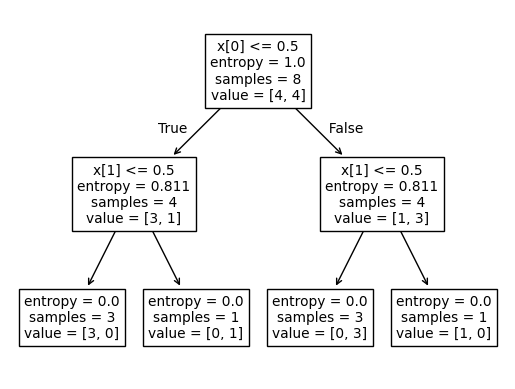

In [174]:
tree.plot_tree(clf.fit(X, y));

# Работаем с данными Титаника ->

In [231]:
df = pd.read_csv("./Data/titanic/train.csv")

In [232]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [234]:
X = df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = df.Survived # Вектор, который нужно предсказать

#### У нас есть строкчные данные (тип str). Нам нужно превратить эти данные в числовые. ->
_Воспользуемся методом pandas **get_dummies**, который автоматически превратит все строковые данные в числовые_


In [235]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [236]:
X = pd.get_dummies(X)

#### этот метод делает one-hot-encodding для все строчных фичей. Но появляется True/False. Соответственно мы можем изменить T/F на 1/0 соответственно

In [237]:
X["Sex_female"] = X["Sex_female"].astype(int)
X["Sex_male"] = X["Sex_male"].astype(int)
X["Embarked_C"] = X["Embarked_C"].astype(int)
X["Embarked_Q"] = X["Embarked_Q"].astype(int)
X["Embarked_S"] = X["Embarked_S"].astype(int)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


#### В данном случае у нас есть две фичи Sex_female и Sex_male. Очев можно оставить только один столбик, но для решающих деревьев это не критично. НО если бы мы решали с помощью лин.рег. то могли бы быть проблемы
_**Заполним пропущенные значения, тк решающее дерево не умеет с ними работать ->**_

In [238]:
X = X.fillna({"Age" : X.Age.median()})

In [239]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Обучим модель (переобучим)

In [240]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [241]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

#### Отрисуем вершины решающего дерева ->
_**Чистое переобучение модели. Подгнала результат под каждый возможный случай. Для этого набора данных ошибка будет минимальной. Для обучающего набора данных ошибка будет огромной.**_

Это происходит из-за того, что мы не указали глубину дерева. Из-за этого итоговая энтропия получается либо 1, либо 0. Это плохой знак. Нам нужно обобщить и, главне, найти закономерность 

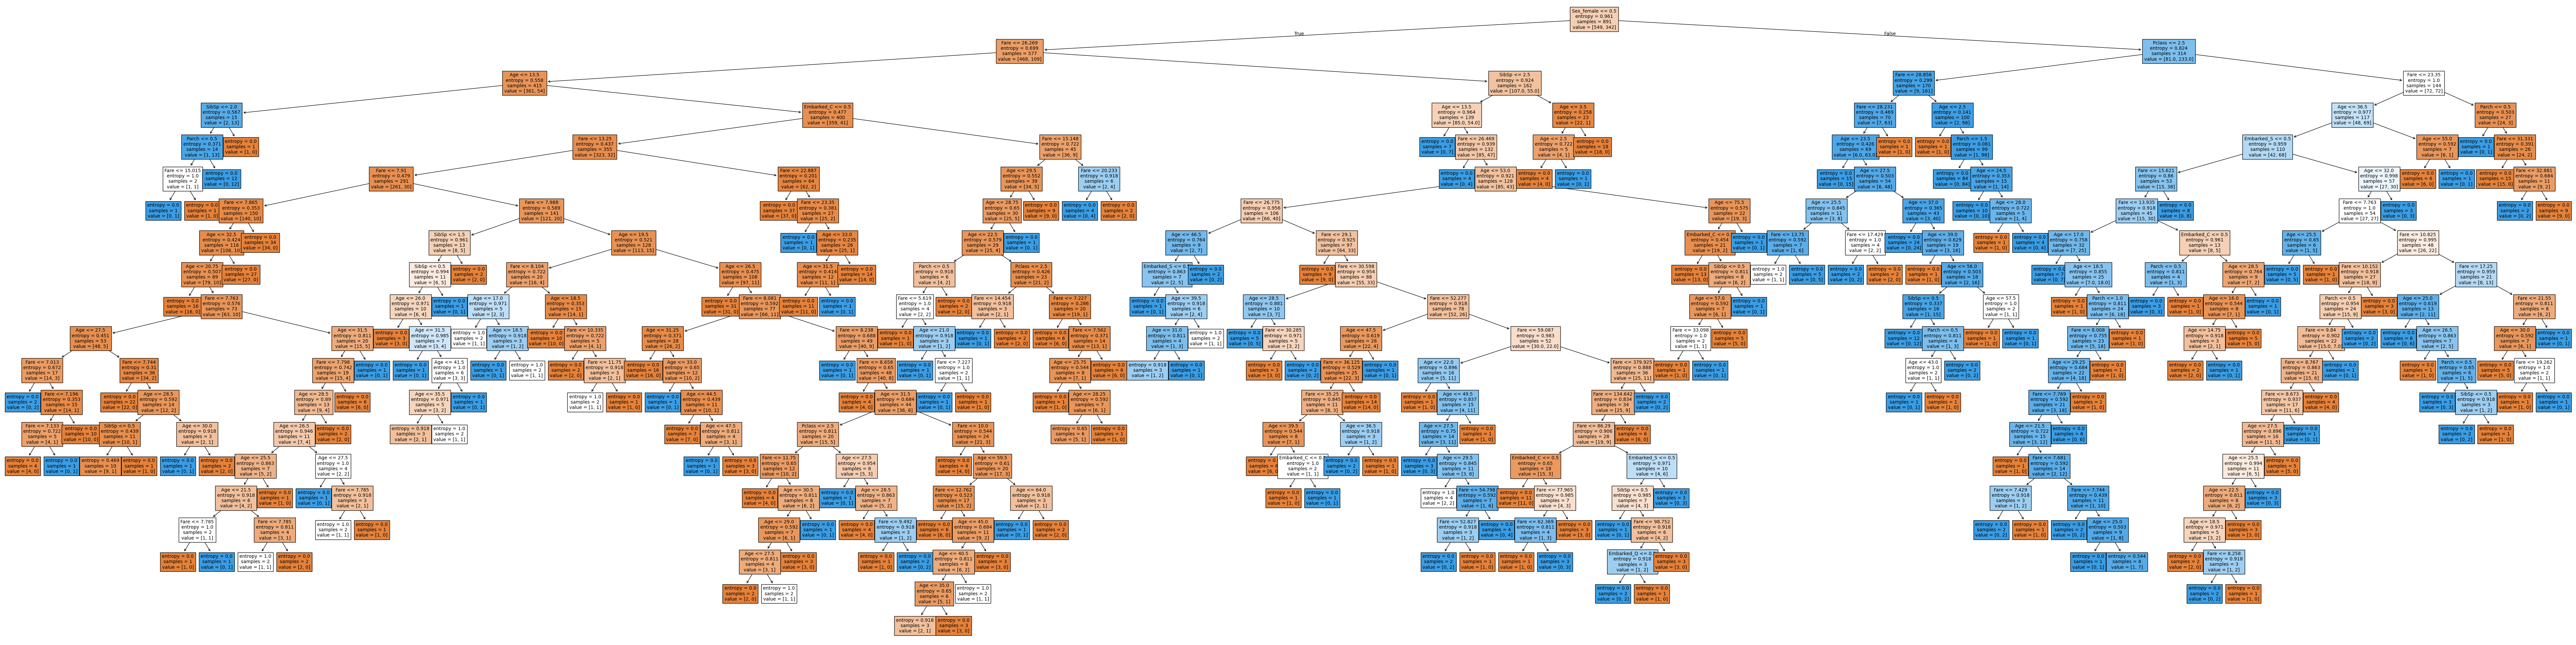

In [242]:
plt.figure(figsize=(100, 25))
graph = tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True);

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [244]:
# доля правильных ответов на выборке
clf.score(X, y)

0.9797979797979798

### Обучим модель (правильно)

In [245]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [246]:
clf.score(X_train, y_train)

0.9798657718120806

In [247]:
clf.score(X_test, y_test)

0.7796610169491526

In [248]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5) # указываем максимальную глубина (наугад пока что)

clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [249]:
clf.score(X_train, y_train)

0.8406040268456376

In [250]:
clf.score(X_test, y_test)

0.8067796610169492

#### Вывод: хоть и доля правильных ответов уменьшилось, но на тестовой выборке эта доля не уменьшилась => переобучения не произошло (сильного)

In [251]:
from sklearn.model_selection import cross_val_score

In [252]:
max_depth_value = range(1, 100)
scores_data = pd.DataFrame()

### Подбор оптимальных параметров вручную

In [253]:
for depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    
    temp_score_data = pd.DataFrame({"max_depth" : [depth],
                                    "train_score" : [train_score],
                                    "test_score" : [test_score], 
                                    "cross_val_score" : [mean_cross_val_score]})

    scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

#### Изменим вид DataFrame с помощью метода melt. 

In [254]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"], value_vars=["train_score", "test_score", "cross_val_score"], 
                           var_name="set_type", value_name="score")


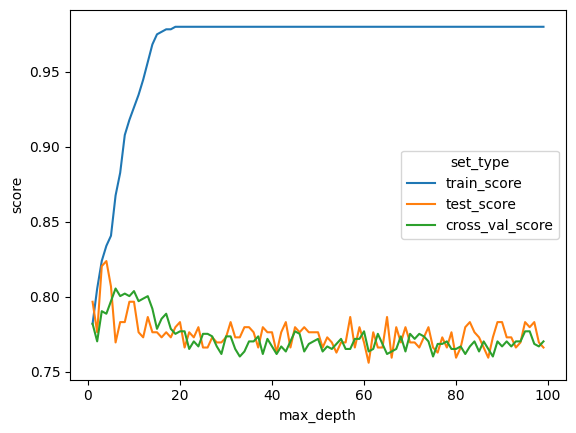

In [255]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long);

In [256]:
scores_data_long[scores_data_long["set_type"] == "cross_val_score"].head(5)
# видим, что максимальный score достигается при max_depth = 10 => стоит указывать max_depth = 10 при обучении, как финальный вариант

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031


### Подбор параметров через функцию GreedSearchCV

In [257]:
from sklearn.model_selection import GridSearchCV

In [258]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth': range(1, 30)}
clf = tree.DecisionTreeClassifier()

In [259]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [260]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [261]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

#### Вывод: после max_depth = 3 у нас происходит переобучение.
_Если посмотреть на дерево для **max_depth=3**, все равно можно заметить **переобучение** на левой ветке. Последнее условие приводит к **энтропии равной единице**, что является **полной неопределенностью**_

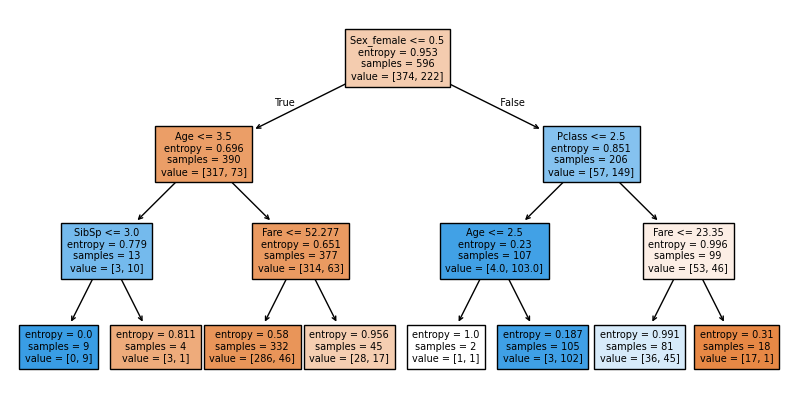

In [202]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
tree.plot_tree(clf, fontsize=7, feature_names=list(X), filled=True);

### Кроссвалидация
_Разделение датасета на **несколько частей**, после чего поочередно **обучаем и тестируем** на разделенных множествах_

In [203]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)


In [263]:
cross_val_score(clf, X_train, y_train, cv=5)

# 1 - обучился на 1, 2, 3, 4  , предсказал на 5
# 2 - обучился на 1, 2, 3,   5, предсказал на 4
# 3 - обучился на 1, 2,   4, 5, предсказал на 3
# ...

array([0.75      , 0.76470588, 0.75630252, 0.78151261, 0.7394958 ])

#### Обучим дерево с новым max_depth = 10
_Мы поняли, что **максимальный score** достигается при **max_depth = 10** (в цикле добавили столбик, построили график с тремя линиями и нашли максимальный score)._

In [205]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10)

In [206]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [207]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7864406779661017

# Обучим решающее дерево на новых данных ->

In [208]:
data_iris = pd.read_csv("./Data/train_iris.csv")
data_iris_test = pd.read_csv("./Data/test_iris.csv")

In [209]:
data_iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [210]:
X_train = data_iris.drop(['Unnamed: 0', "species"], axis=1)
y_train = data_iris.species


In [211]:
X_test = data_iris_test.drop(['Unnamed: 0', "species"], axis=1)
y_test = data_iris_test.species


In [212]:
max_depth_value = range(1, 100)
scores_data = pd.DataFrame()

In [213]:
for depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    
    temp_score_data = pd.DataFrame({"max_depth" : [depth],
                                    "train_score" : [train_score],
                                    "test_score" : [test_score], 
                                    "cross_val_score" : [mean_cross_val_score]})

    scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

In [214]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.70,0.60,0.70
1,2,0.97,0.94,0.95
2,3,0.99,0.94,0.96
3,4,1.00,0.92,0.96
4,5,1.00,0.92,0.96


In [215]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"], value_vars=["train_score", "test_score"], 
                           var_name="set_type", value_name="score")


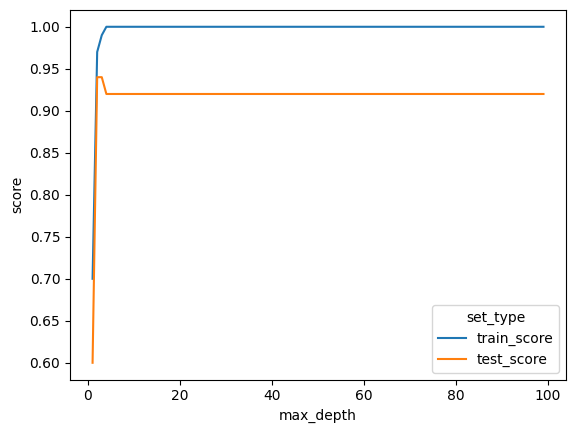

In [216]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long);


# Обучим модель с нуля на новых данных ->

In [222]:
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [223]:
df = pd.read_csv("./Data/dogs_n_cats.csv")

In [224]:
X = df.drop(["Вид"], axis=1)
y = df.Вид
y

0      собачка
1      собачка
2      собачка
3      собачка
4      собачка
        ...   
995      котик
996      котик
997      котик
998      котик
999      котик
Name: Вид, Length: 1000, dtype: object

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [226]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=100, random_state=42)

In [227]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=42)

In [228]:
data_predict = pd.read_json("./Data/dataset_209691_15.txt")

In [229]:
dat = clf.predict(data_predict)
dat = pd.DataFrame(dat)

In [230]:
dat[dat[0] == "собачка"].count()

0    53
dtype: int64

# Обучения дерева с перебором параметров ->

In [264]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Инициализация Дерева
dt = DecisionTreeClassifier()

# Словарь параметров для Дерева и их диапазоном значений
dt_params = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)}

# Обучение Дерева с перебором значений параметров
search = GridSearchCV(dt, param_grid=dt_params, cv=5)
search.fit(X, y)

# Дерево с лучшим сочетаением параметров
best_tree = search.best_estimator_

In [276]:
from sklearn.ensemble import RandomForestClassifier

In [275]:
clf_rf = RandomForestClassifier()

In [277]:
parametrs = {'n_estimators': [10, 20, 30],"max_depth": [2, 5, 7, 101]}

In [278]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [280]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 101],
                         'n_estimators': [10, 20, 30]})

In [291]:
best_clf = grid_search_cv_clf.best_estimator_

In [292]:
best_clf

RandomForestClassifier(max_depth=5, n_estimators=20)

In [293]:
grid_search_cv_clf.score(X_test, y_test)

0.7932203389830509

In [ ]:
feature_importances = best
_clf. feature_importances_
In [132]: feature_importances_df = pd. DataFrame({' features' :list(X_train),
'feature_importances': feature_ importances})
In [136]: feature_importances_df.sort_values( 'feature_importances', ascending=False)

In [294]:
feature_importances = best_clf.feature_importances_

In [296]:
feature_importances_df = pd.DataFrame({'features': list(X_train), "feature_importances": feature_importances})

In [300]:
feature_importances_df.sort_values("feature_importances", ascending=0)

,features,feature_importances
5,Sex_female,0.258082
6,Sex_male,0.204513
0,Pclass,0.152661
4,Fare,0.131620
1,Age,0.116134
2,SibSp,0.044837
3,Parch,0.037966
9,Embarked_S,0.034486
7,Embarked_C,0.014699
8,Embarked_Q,0.005003


In [303]:
data_heart = pd.read_csv("./Data/heart-disease.csv")

In [313]:
X_train_heart = data_heart.drop("target", axis=1)
y_train_heart = data_heart.target

In [308]:
np.random.seed(0)

clf = RandomForestClassifier(10, max_depth=5)

In [314]:
clf.fit(X_train_heart, y_train_heart)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [315]:
feature_importances = clf.feature_importances_

In [318]:
feature_importances_df = pd.DataFrame({'features': list(X_train_heart), "feature_importances": feature_importances})

In [320]:
feature_importances_df.sort_values("feature_importances", ascending=0)

,features,feature_importances
12,thal,0.198525
2,cp,0.139983
7,thalach,0.129550
9,oldpeak,0.116645
11,ca,0.077048
10,slope,0.069208
4,chol,0.056887
3,trestbps,0.053569
8,exang,0.048079
0,age,0.043441


<Axes: >

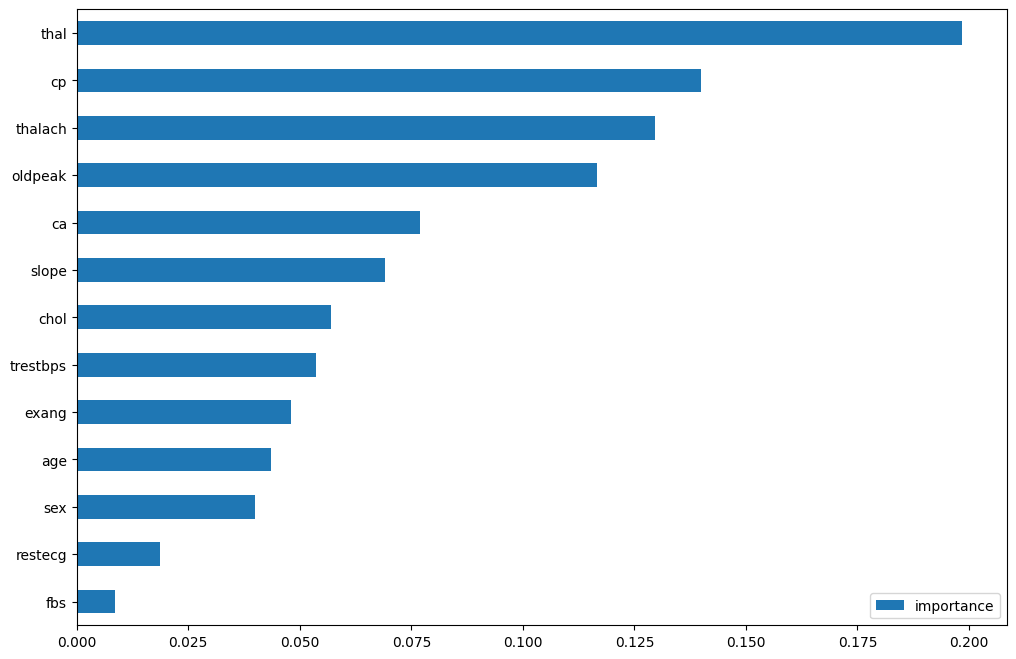

In [321]:
imp = pd.DataFrame(clf.feature_importances_, index=X_train_heart.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
